# Breast Cancer Diagnostic Support Vector Machines (SVM) 
### [Breast Cancer Wisconsin (Diagnostic)](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Breast_Cancer_Diagnostic.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']]
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
radius_mean               569 non-null float64
texture_mean              569 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave points_mean       569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
diagnosis                 569 non-null object
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


## EDA

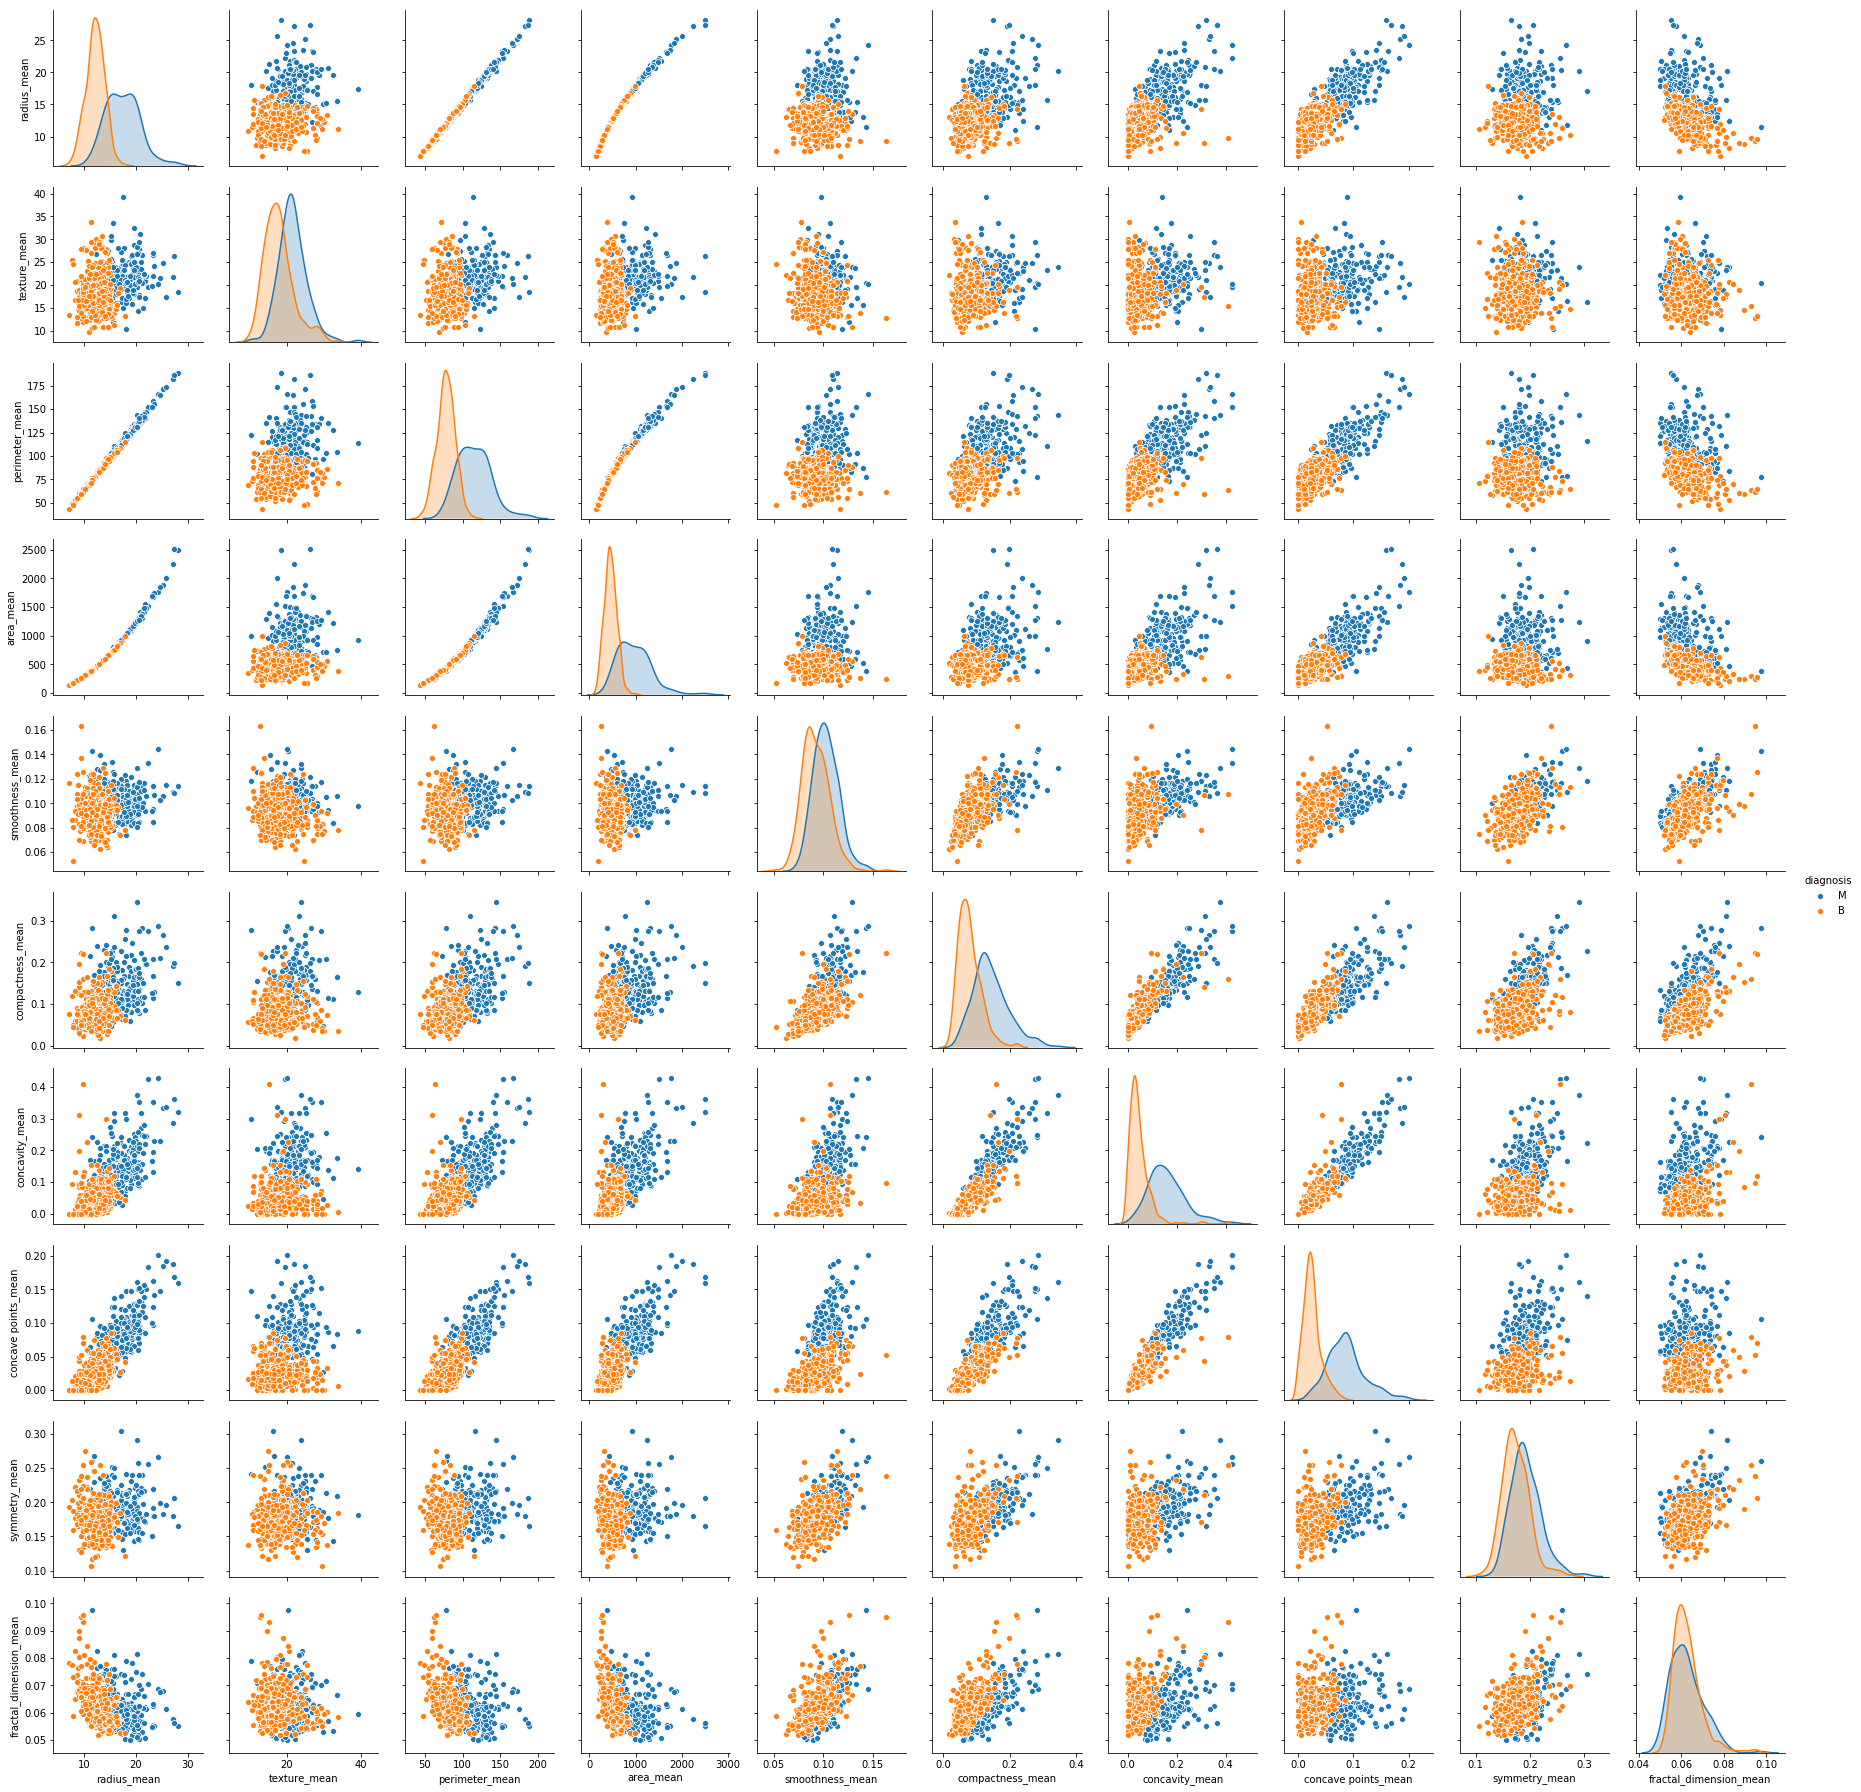

In [5]:
sns.pairplot(df, hue='diagnosis')

In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

### Support Vector Classifier

In [8]:
from sklearn.svm import SVC
svm_model = SVC(gamma='auto')
svm_model.fit(X_train,y_train)
predictions = svm_model.predict(X_test)

### Evaluation

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[103   5]
 [ 50  13]]


In [10]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.67      0.95      0.79       108
           M       0.72      0.21      0.32        63

   micro avg       0.68      0.68      0.68       171
   macro avg       0.70      0.58      0.56       171
weighted avg       0.69      0.68      0.62       171



### Gridsearch

In [11]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001]}

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
grid = GridSearchCV(SVC(), param_grid, cv=10,verbose=2,n_jobs=-1)

In [14]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   16.2s finished
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [15]:
print('The best parameters are %s with a score of %0.2f'% (grid.best_params_, grid.best_score_))

The best parameters are {'C': 100, 'gamma': 0.0001} with a score of 0.89


In [16]:
grid.best_params_

{'C': 100, 'gamma': 0.0001}

In [17]:

display(pd.DataFrame(grid.cv_results_).sort_values(by='mean_test_score').head(10))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
5,0.034580,0.010532,0.004999,0.002489,1,1,"{'C': 1, 'gamma': 1}",0.625,0.625,0.625,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
0,0.027384,0.006340,0.004798,0.002038,0.1,1,"{'C': 0.1, 'gamma': 1}",0.625,0.625,0.625,...,0.625698,0.625698,0.625698,0.625698,0.625698,0.625698,0.625698,0.625000,0.625628,0.000209
1,0.030084,0.004155,0.004496,0.001801,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.625,0.625,0.625,...,0.625698,0.625698,0.625698,0.625698,0.625698,0.625698,0.625698,0.625000,0.625628,0.000209
2,0.022189,0.003153,0.004197,0.002226,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.625,0.625,0.625,...,0.625698,0.625698,0.625698,0.625698,0.625698,0.625698,0.625698,0.625000,0.625628,0.000209
20,0.037380,0.007098,0.005098,0.001920,1000,1,"{'C': 1000, 'gamma': 1}",0.650,0.625,0.625,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
10,0.037180,0.005266,0.005496,0.002457,10,1,"{'C': 10, 'gamma': 1}",0.650,0.625,0.625,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
15,0.033382,0.005495,0.004397,0.001743,100,1,"{'C': 100, 'gamma': 1}",0.650,0.625,0.625,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.031580,0.004027,0.004600,0.002009,1,0.1,"{'C': 1, 'gamma': 0.1}",0.675,0.700,0.700,...,0.991620,0.986034,0.988827,0.986034,0.986034,0.986034,0.988827,0.986111,0.987717,0.002229
21,0.032581,0.005001,0.003799,0.000979,1000,0.1,"{'C': 1000, 'gamma': 0.1}",0.725,0.750,0.700,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
11,0.029983,0.003973,0.006397,0.003103,10,0.1,"{'C': 10, 'gamma': 0.1}",0.725,0.750,0.700,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


We can also get the best estimator, score etc `grid.best_estimator_,grid.best_score_` .

In [18]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Predictions and Evaluation

In [19]:
grid_predictions = grid.predict(X_test)

In [20]:
print(confusion_matrix(y_test,grid_predictions))

[[103   5]
 [  9  54]]


In [21]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           B       0.92      0.95      0.94       108
           M       0.92      0.86      0.89        63

   micro avg       0.92      0.92      0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171

